In [36]:
import cirq
import numpy as np
from math import pi
#from collections import Counter
import matplotlib.pyplot as plt
#select the number of qubit and define LineQubits structure
n = 3 
qubits = cirq.LineQubit.range(n)
print(qubits)

[cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2)]


In [20]:
#create the circuit
def circuit():      
    circuit = cirq.Circuit()            
    circuit.append(cirq.H(qubits[0]))
    for i in range(n-1):    
        circuit.append(cirq.CNOT(qubits[i],qubits[i+1]))    
    #measurement
    circuit.append(cirq.measure(*qubits, key='x'))          
    #draw the circuit
    print(circuit)        
    return circuit

In [38]:
#select the simulator  and execute the circuit
def simulation(circuit):           
    simulator = cirq.Simulator()
    results = simulator.run(circuit, repetitions=100)
    h = results.histogram(key='x') 
    print(results)   

    #print counter
    print( h )
            
    #plot histogram
    #labels, values = zip(*h.items())
    #indexes = np.arange(len(labels))
    #width = 1
    #plt.bar(indexes, values, width)
    #plt.xticks(indexes + width * 0.5, labels)
    #plt.show()
    
    counts = cirq.plot_state_histogram(results)
    print("counts =", counts)

In [28]:
#main function
def main ():     
    simulation(circuit())

0: ───H───@───────M('x')───
          │       │
1: ───────X───@───M────────
              │   │
2: ───────────X───M────────
x=1011001110101011000111111111010000010101010100111000100010111101000101101110101100100100100101010101, 1011001110101011000111111111010000010101010100111000100010111101000101101110101100100100100101010101, 1011001110101011000111111111010000010101010100111000100010111101000101101110101100100100100101010101
Counter({7: 52, 0: 48})


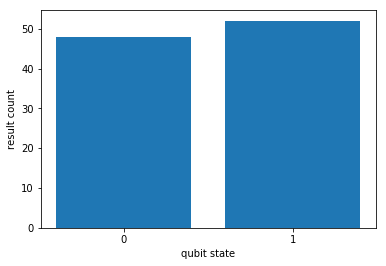

counts = [48. 52.]


In [42]:
if __name__ == '__main__':
    main()

In [59]:
import cirq
import numpy as np
from math import pi
import sympy

0: ───X^s───M('z')───


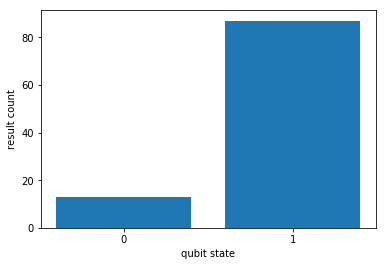

In [67]:
#define LineQubits structure
qubits = cirq.LineQubit.range(1)
#create the circuit
circuit = cirq.Circuit()
# add a gate with a symbol which can take any value
gate = cirq.X**sympy.Symbol('s')
circuit.append(gate(qubits[0]))
# add a measurement
circuit.append(cirq.measure(qubits[0], key="z"))
# show the circuit diagram
print(circuit)
# get a param resolver
resolver = cirq.ParamResolver({'s': np.pi / 4.0})
# run the resolved circuit using the param resolver
simulator = cirq.Simulator()
results = simulator.run(circuit, resolver, repetitions=100)
counts = cirq.plot_state_histogram(results)